In [24]:
from quick_era5 import era5_downloader, era5_converter
import datetime
import matplotlib.pyplot as plt

In [29]:
# 下載ERA5資料
# Download ERA5 data
variable_list = ['2m_temperature', 'u_component_of_wind', 'v_component_of_wind']
from_datetime = datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
to_datetime = datetime.datetime(2020, 1, 2, tzinfo=datetime.timezone.utc)  # 包含此時間（include）
time_interval = 6
level_range = (500, 1000)
longitude_range = (180, 360)
latitude_range = (90, -90)
longitude_shift = True
xarr = era5_downloader.download_era5_data_from_gcs(variable_list, from_datetime, to_datetime, time_interval, level_range, latitude_range, longitude_range, longitude_shift)

xarr

<xarray.Dataset> Size: 343MB
Dimensions:              (time: 5, latitude: 721, longitude: 720, level: 16)
Coordinates:
  * latitude             (latitude) float32 3kB 90.0 89.75 89.5 ... -89.75 -90.0
  * level                (level) int64 128B 500 550 600 650 ... 925 950 975 1000
  * longitude            (longitude) float32 3kB 180.0 180.2 ... 359.5 359.8
  * time                 (time) datetime64[ns] 40B 2020-01-01 ... 2020-01-02
Data variables:
    2m_temperature       (time, latitude, longitude) float32 10MB 246.5 ... 2...
    u_component_of_wind  (time, level, latitude, longitude) float32 166MB 0.0...
    v_component_of_wind  (time, level, latitude, longitude) float32 166MB 0.0...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-10-17 20:04:10.783634
    valid_time_stop:   2024-07-31

In [30]:
# 將xarray資料轉換成netcdf檔案
# Convert xarray data to netcdf file
era5_converter.era5_xarray_to_netcdf(xarr, 'output.nc')

In [31]:
# 將xarray資料轉換成numpy array
# Convert xarray data to numpy array
variable = '2m_temperature'
time = datetime.datetime(2020, 1, 1, 12, tzinfo=datetime.timezone.utc)
z = None
array = era5_converter.era5_xarray_to_nparray(xarr, variable, z, time)

array

array([[245.96442, 245.96442, 245.96442, ..., 245.96442, 245.96442,
        245.96442],
       [246.71997, 246.72151, 246.7246 , ..., 246.19061, 246.19215,
        246.19678],
       [246.88   , 246.88617, 246.89232, ..., 246.28448, 246.29065,
        246.2968 ],
       ...,
       [245.57355, 245.57509, 245.57971, ..., 247.44937, 247.45245,
        247.45708],
       [246.25679, 246.25986, 246.25986, ..., 247.14622, 247.14777,
        247.1493 ],
       [246.74306, 246.74306, 246.74306, ..., 246.74306, 246.74306,
        246.74306]], dtype=float32)

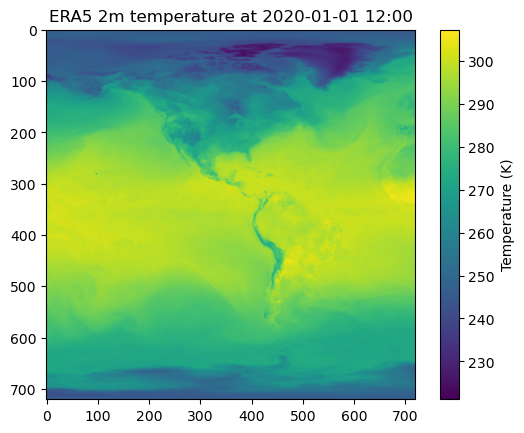

In [32]:
# 將numpy array繪製成圖
# Plot numpy array
plt.imshow(array)
plt.title("ERA5 2m temperature at 2020-01-01 12:00")
plt.colorbar().set_label('Temperature (K)')
plt.show()